In [4]:
library(tidyverse)
options(repr.plot.width = 10 , repr.plot.height = 6, jupyter.plot_mimetypes = "image/png") 
theme_set(theme_classic())

# STATS 504
## Week 3: Exploratory data analysis

# Peer review
- If you submitted the assignment, peer reviews are now assigned.
- They are due on deadline +3days (Wednesday night in this case).
- Doubly blind.
- Peer reviews are not considered complete until you *both* fill out the rubric and leave a brief (1-2 paragraphs) summary of your opinion the work.
- **Be polite but critical**.

**critical** | ˈkridək(ə)l |
_adjective_
1. Expressing adverse or disapproving comments or judgments: "he was critical of many U.S. welfare programs."
2. **Expressing or involving an analysis of the merits and faults of a work of literature, music, or art**: 
    - "She never won the critical acclaim she sought."
    - (of a published literary or musical text) incorporating a detailed and scholarly analysis and commentary: "a critical edition of a Bach sonata."
    - involving the objective analysis and evaluation of an issue in order to form a judgement: <u"professors often find it difficult to encourage critical thinking in their students."


To follow along in today's lecture you'll need to load `tidyverse` and also install the `nycflights13` package:

In [38]:
# install.packages('nycflights13')
library(nycflights13)

## What is exploratory data analysis

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" style="margin: 0 0 0 20px; float: right" />

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.



## EDA (concrete version)

1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.
4. (Return to #1).

Two types of questions are always useful for making discoveries within your data:

- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?

## Variation
- Real-life variables change from measurement to measurement. 
- This is often true even if you measure the same thing twice!
- Each measurements has a small amount of error ("noise").
- The noise is different each time you take a measurement.

## Covariation
- Real-life variables tend to change together in a related way.
- The best way to spot covariation is to visualize the relationship between two or more variables.

## Continuous vs. discrete
The appropriate visualization will depend on whether the data are:
- *Continuous*: they take on an infinite number of ordered values.
- *Discrete*: the take on one of a small number of values.

## 🤔 Manfacturers

Continuous or discrete?: `mpg$manufacturer`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [42]:
mpg$manufacturer %>% unique %>% length

[1] 15

## 🤔 Prices

Continuous or discrete?: `diamonds$price`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [49]:
diamonds$price %>% unique %>% length

[1] 11602

## 🤔 Ages

Continuous or discrete?: `mil$age`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [53]:
mil$age

[1] 28                     33                     45                    
   [4] 66                     52                     VOL DON'T KNOW/REFUSED
   [7] 60                     54                     48                    
  [10] 48                     63                     44                    
  [13] 83                     53                     83                    
  [16] 48                     54                     78                    
  [19] 51                     50                     51                    
  [22] 55                     68                     36                    
  [25] 26                     69                     55                    
  [28] 41                     38                     69                    
  [31] VOL DON'T KNOW/REFUSED 18                     80                    
  [34] 75                     81                     57                    
  [37] 34                     49                     42                    
  [40] 68                     VOL DON'T KNOW/REFUSED 32                    
  [43] 38                     80                     63                    
  [46] 50                     46                     86                    
  [49] 65                     30                     32                    
  [52] 51                     75                     81                    
  [55] 58                     44                     VOL DON'T KNOW/REFUSED
  [58] 75                     57                     55                    
  [61] 63                     58                     61                    
  [64] 34                     63                     65                    
  [67] 63                     63                     82                    
  [70] 51                     52                     82                    
  [73] 88                     48                     71                    
  [76] 68                     63                     53                    
  [79] 74                     49                     82                    
  [82] 85                     84                     78                    
  [85] 52                     20                     85                    
  [88] 50                     62                     65                    
  [91] 54                     55                     69                    
  [94] 76                     66                     36                    
  [97] VOL DON'T KNOW/REFUSED 93                     78                    
 [100] 58                     67                     63                    
 [103] 58                     57                     60                    
 [106] 74                     50                     52                    
 [109] 67                     63                     73                    
 [112] 59                     50                     73                    
 [115] 42                     28                     48                    
 [118] 58                     63                     80                    
 [121] 44                     63                     30                    
 [124] 79                     65                     63                    
 [127] 50                     42                     65                    
 [130] 68                     34                     55                    
 [133] 66                     22                     58                    
 [136] 56                     40                     54                    
 [139] VOL DON'T KNOW/REFUSED 75                     52                    
 [142] 64                     40                     75                    
 [145] 34                     89                     51                    
 [148] 85                     83                     39                    
 [151] 44                     36                     81                    
 [154] 66                     48                     39                    
 [157] 59                     65                   

## One continuous variable

First we will focus on understanding the distribution of one continuous variable.

`morley` is a built-in dataset measuring the speed of light:

In [66]:
morley$Speed

[1]  850  740  900 1070  930  850  950  980  980  880 1000  980  930  650  760
 [16]  810 1000 1000  960  960  960  940  960  940  880  800  850  880  900  840
 [31]  830  790  810  880  880  830  800  790  760  800  880  880  880  860  720
 [46]  720  620  860  970  950  880  910  850  870  840  840  850  840  840  840
 [61]  890  810  810  820  800  770  760  740  750  760  910  920  890  860  880
 [76]  720  840  850  850  780  890  840  780  810  760  810  790  810  820  850
 [91]  870  870  810  740  810  940  950  800  810  870

## 🤔 Types of variables
How would you describe the types `Expt`/`Run`/`Speed` in these data?

<ol style="list-style-type: upper-alpha;">
    <li>Continuous / Continuous / Continuous </li>
    <li>Discrete / Discrete / Discrete</li>
    <li>Continuous / Discrete / Continuous</li>
    <li>Discrete / Discrete / Continuous</li> 
</ol>

Here we're measuring the speed of light, an absolute, unchanging, physical constant:

$$c = 299,792,458 \, m/s.$$

But we get a different value with every experiment. Why?

## Visualizing variation in our data

In order to understand how accurately we measured the speed of light, we first need to assess its *variation*. Since the measurement is continuous, we have several options:

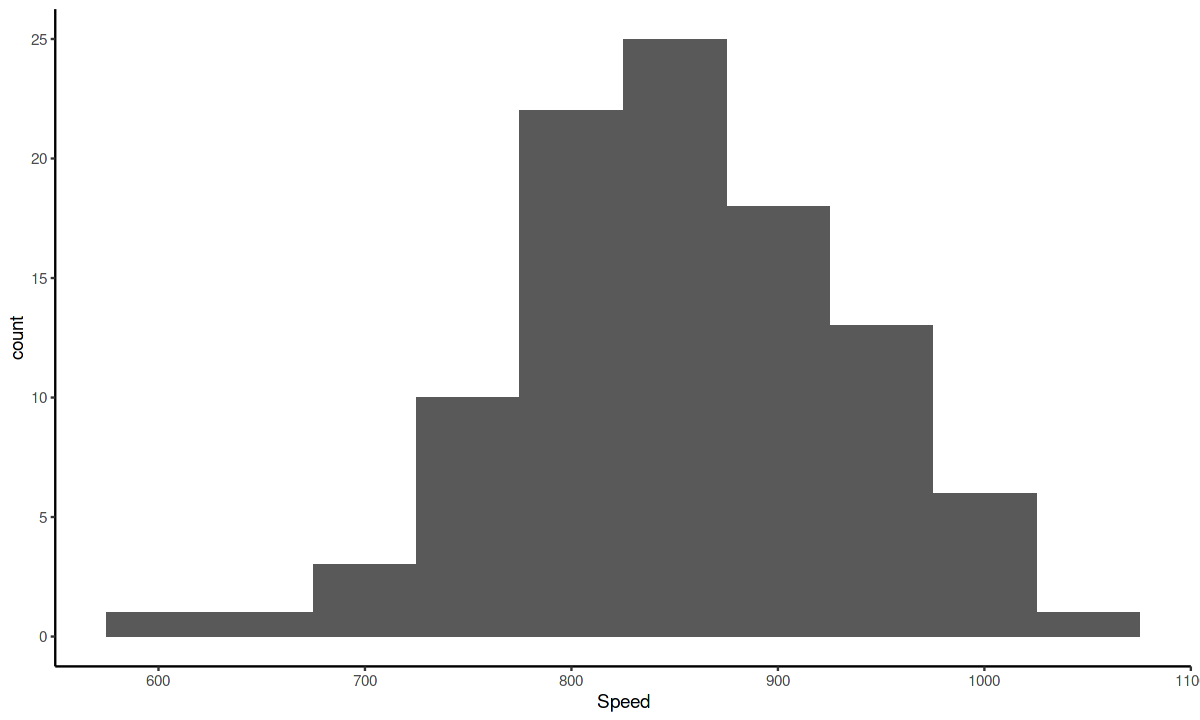

In [80]:
# plot a histogram

ggplot(morley) + geom_histogram(aes(x = Speed), bins=10)


### Adjusting a histogram
Any dataset can be plotted using multiple different histograms. For example:

In [ ]:
# adjust the bins/binwidth/breaks in a histogram

There is no one right answer for "how many different bins" -- different values tell different stories about your variable
- Larger values of bins are more detailed but have higher *variance*
- Smaller values are smoother but have higher *bias*

## Follow-up questions
Now that we can see variation in our data, what sort of follow-up questions should we ask?

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

## The diamonds dataset
Let's look at a different dataset built into R:

In [81]:
print(diamonds)

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# ℹ 53,930 more rows


This is a dataset of price, quality, and other characteristics for 54k diamonds.

In [89]:
# histogram of carat

# ggplot(diamonds) + geom_histogram(aes(x = carat), bins=500)

diamonds$carat %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.4000  0.7000  0.7979  1.0400  5.0100 

## 🤔 Quiz

What can be said about the distribution of `carat` in the `diamonds` dataset? (Check all that apply.)

<ol style="list-style-type: upper-alpha;">
    <li>Almost all diamonds are &lt; 3 carats.</li>
    <li>Missing values are encoded as <code>carat = -1</code>.</li>
    <li>Diamond makers appear to prefer diamonds that are rounded to the nearest .1 or .5 or carat.
    <li>There are more diamonds between 0 and 1 carats than &gt;1 carats.</li>
    <li>There are more diamonds that measure 2.0 carats than there are that measure between 1.8 and 2.0 carats.</li>
</ol>

(Hint: plot a histogram, and try out different values for `bins`, `breaks`, or, `binwidth`.)

In [ ]:
# more histograms of carat

## Unusual values (outliers)
Outliers are "unusual" observations. 
- Sometimes they are due to data entry errors.
- Sometimes they are important for other reasons. 

In [97]:
# histogram of diamonds$y

diamonds %>% filter(y > 20)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12


## Visualizing the distribution of a discrete variable
For a discrete variable, generally the only thing we're interested in is the count of each different value that the variable can assume. For this, something like a bar plot is often used:

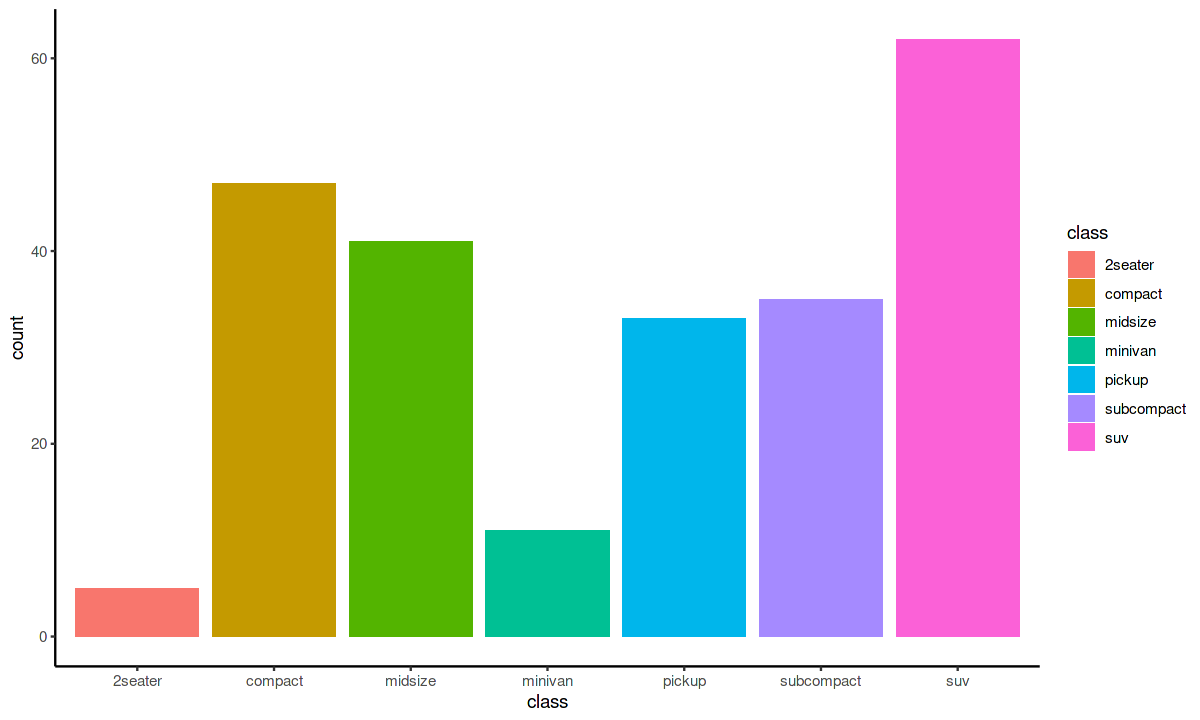

In [34]:
ggplot(mpg) + geom_bar(aes(x = class, fill = class))

## Discrete variables with many values
Sometimes a discrete variable can take on a lot of values, such that it's not practical to plot its entire distribution. For example:

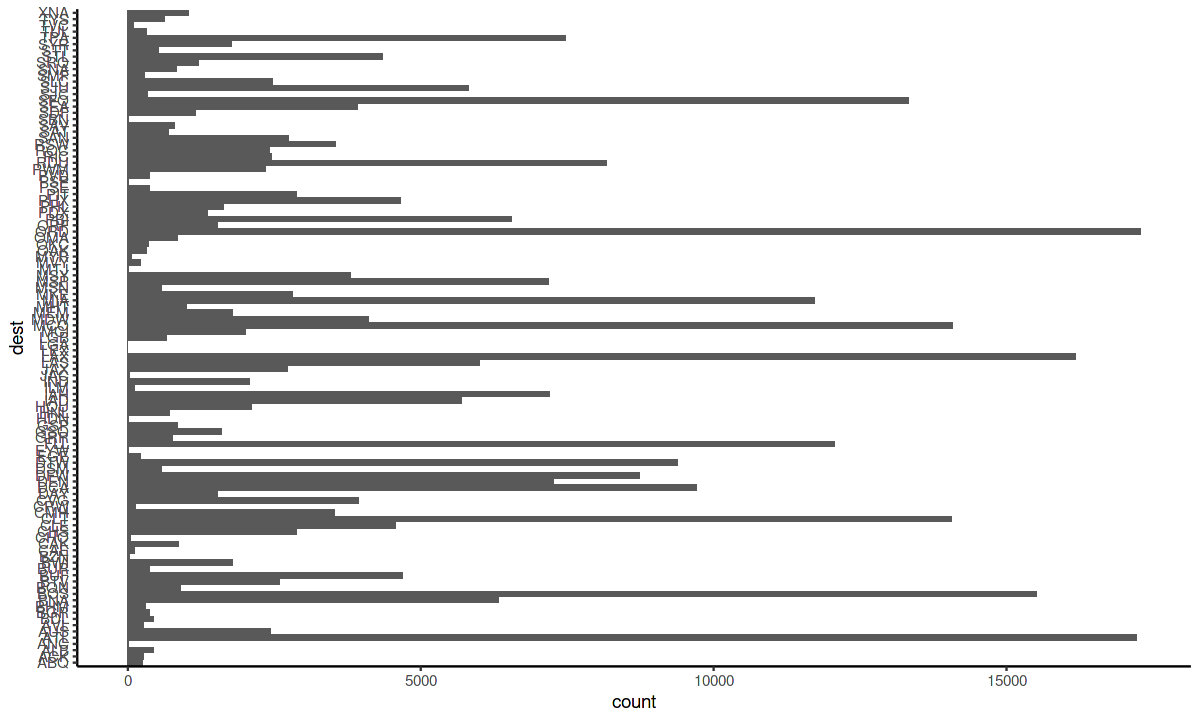

In [102]:
# bar plot of flight destinations

flights %>% ggplot + geom_bar(aes(y = dest))

In this case we can reduce the data in some way, for example, only plotting the most common airports:

In [109]:
# counts of number of different origin airport

flights %>% mutate(dest_lump = fct_lump(dest))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dest_lump
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<fct>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,IAH
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,IAH
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,MIA
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,BQN
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,ATL
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,ORD
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,FLL
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,IAD
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,MCO


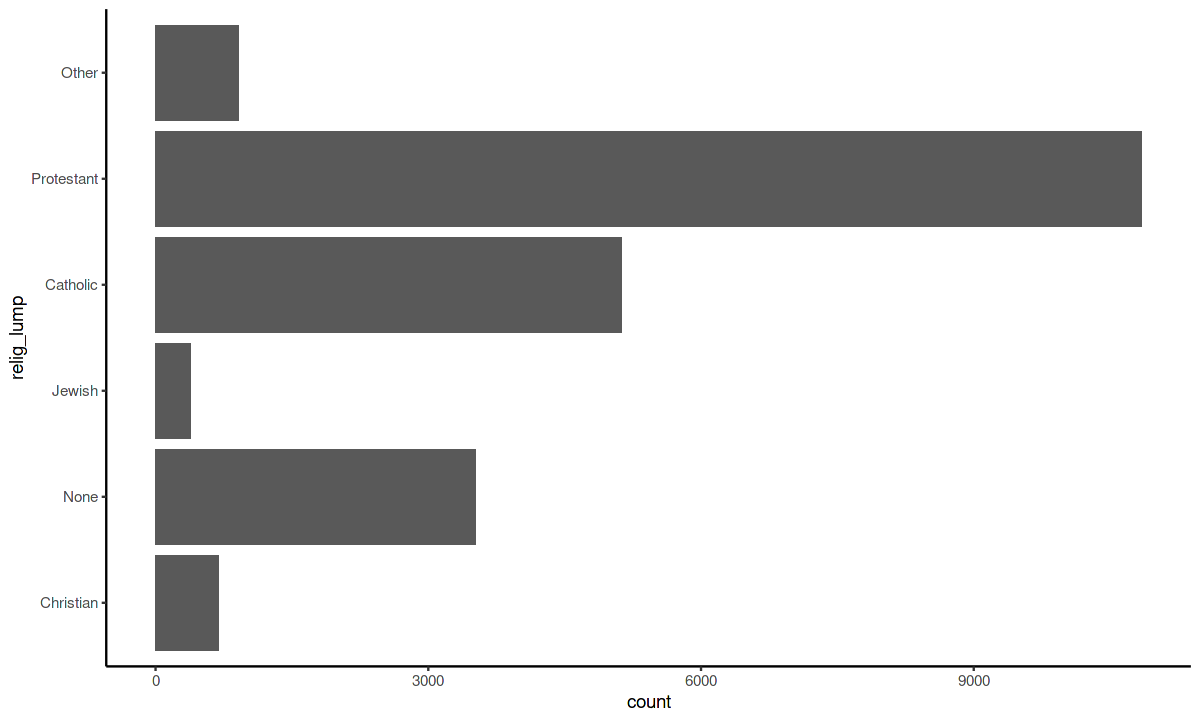

In [118]:
library(forcats)
gss_cat %>% mutate(relig_lump = fct_lump(relig, 5)) %>% 
    ggplot + geom_bar(aes(y = relig_lump))

In [ ]:
# naive plot

In [ ]:
# lump uncommon factors together

## Covariation
**Covariation** is when multiple variables vary together in a similar way. Covariation is everwhere, e.g.:
- Height and weight
- Political preference and religion
- Income this year vs. income last year
- Etc.

One of the best way to spot covariation is to visualize the "joint distribution" of both variables.

When studying covariation among two variables, there are three possibilities, depending on whether the variables are continuous, discrete, or a mixture.

## Continuous and discrete 
With one continuous and one discrete variable, there are several choices:
- Box-and-whisker plot
- Multiple/colored histograms

Let's return to the `morley` dataset and consider covariation between `Expt` (experiment) and `Speed`:

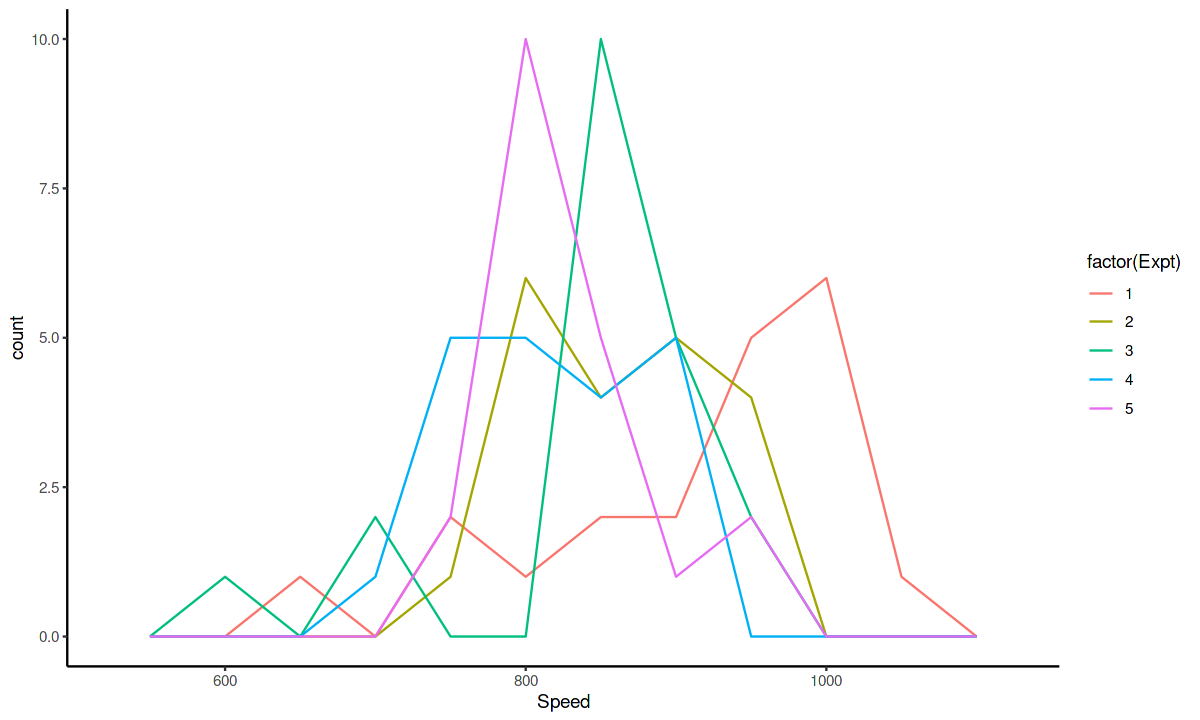

In [136]:
ggplot(morley) + geom_freqpoly(aes(x = Speed, color = factor(Expt)), bins=10)
                               

Let's study covariation of `cut` and `price` in the `diamonds` data set.

In [ ]:
# boxplot cut vs price

## Two discrete variables
To study covariation between two discrete variables, we can count the number of observations for each combination of values:

In [143]:
# geom_count to count the number of values for color and cut

xtabs(~ color + cut, diamonds) %>% prop.table %>% round(3)

     cut
color  Fair  Good Very Good Premium Ideal
    D 0.003 0.012     0.028   0.030 0.053
    E 0.004 0.017     0.044   0.043 0.072
    F 0.006 0.017     0.040   0.043 0.071
    G 0.006 0.016     0.043   0.054 0.091
    H 0.006 0.013     0.034   0.044 0.058
    I 0.003 0.010     0.022   0.026 0.039
    J 0.002 0.006     0.013   0.015 0.017

Another type of plot you will see often (especially in bio) is a heat map:

In [ ]:
# geom_tile to count the number of values for color and cut

## Two continuous variables
Finally, if we're studying the covariation between two continuous variables, we have several options:
- Scatter plot (`geom_point`)
- Binning (`geom_bin2d`/`geom_hex`)
- Contour/bivariate density (`geom_density_2d`)

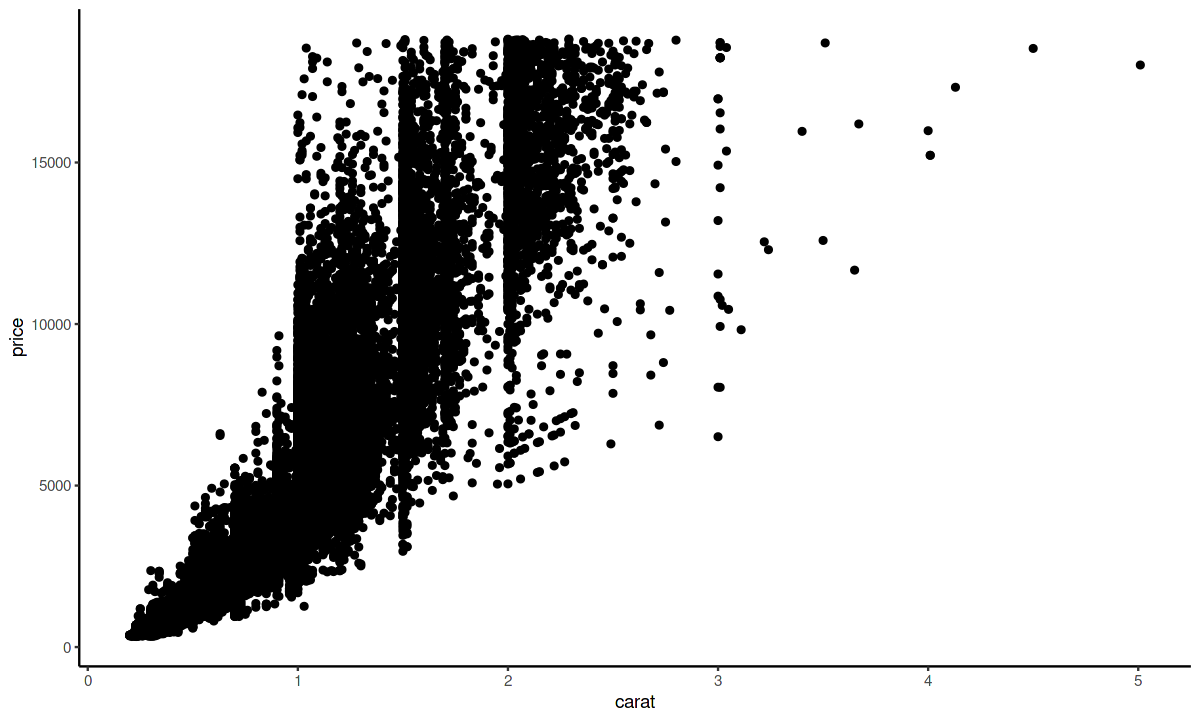

In [144]:
# different geoms for carat vs. price
diamonds %>% ggplot(aes(x = carat, y = price)) + geom_point()

## Three or more variables
Sometimes we even want to study the covariance among of three or more variables. Visualizing >2 dimensional data is, in general, challenging. The best solution tends to depend on the problem at hand.

## Speed of light
Let's consider covariation between all three variables in `morley`:

In [ ]:
# covariation between Speed, Run, and Expt
morley %>% ggplot(aes(x = Speed)) + geom_histogram() +
    facet_grid(~ factor(Expt))

## Millenials
Let's use these techniques to explore a data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

In [37]:
load(url('https://github.com/terhorst/stats504/raw/main/lectures/week3/millennials.RData'))
mil

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,⋯,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,⋯,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,⋯,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,⋯,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,⋯,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,⋯,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,⋯,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
60,PA,Pretty happy,Not important,One of the most important things,One of the most important things,One of the most important things,One of the most important things,Not important,One of the most important things,⋯,NA,NA,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
54,NC,Not too happy,Very important but not the most,Very important but not the most,Very important but not the most,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,NA,No,Yes,1,Full-time,NA,NA,NA,High school graduate (Grade 12 or GED certificate),Covered by health insurance
48,FL,Pretty happy,Somewhat important,One of the most important things,One of the most important things,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,No,No,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script [here](https://docs.google.com/file/d/14U2-rS_ljS7kH97PMFqmNMKDwefSL5AS/edit?usp=docslist_api&filetype=msword).

## 🤔 Ages

What would be a good way to visualize `mil$age`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Density plot</li>
    <li>Something else</li>
</ol>

In [ ]:
# visualize age

## 🤔 Geography

What would be a good way to visualize `mil$state`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Bar plot</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Something else</li>
</ol>

In [ ]:
# visualize state

In [35]:
mil_states <- count(mil, state) %>% rename(abbr=state)
states %>% mutate(state=region) %>% 
    left_join(tibble(abbr=state.abb, state=str_to_lower(state.name))) %>%    
    left_join(mil_states) %>% 
    ggplot + geom_polygon(aes(x=long, y=lat, group=group, fill=n)) +
    coord_map()

ERROR: Error in count(mil, state): object 'mil' not found


## Life goals
Columns `q8a-q8h` ask the respondents to rate the importance of:

    a.  Being successful in a high-paying career or profession
    b.  Having a successful marriage
    c.  Living a very religious life
    d.  Being a good parent
    e.  Having lots of free time to relax or do things you want to do
    f.  Becoming famous
    g.  Helping other people who are in need
    h.  Owning your own home
    
The response scale is:

    1 One of the most important things
    2 Very important but not the most
    3 Somewhat important
    4 Not important
    9 Don’t know/Refused (VOL.)
    
What is a good way to summarize these responses?

In [ ]:
# Summarizing goals

## Social networking

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
What sort of variable is this (`mil$q20`)? How should we visualize it?

In [ ]:
summary(mil$q20)

## Social networking and age
How should I visualize **co**variation in age and social networking use?

In [ ]:
# Age and social joint distribution

## Beyond plotting
Some other EDA tools that are useful:
- Dimensionality reduction (e.g. PCA)
- Missing value analysis
- Outlier analysis

## Flights data
- Report 2 asks you to analyze a dataset of information about flights.
- We'll study the actual dataset next lecture.
- For today's lecture, we'll analyze a pre-formatted version.

In [3]:
library(nycflights13)

flights %>% p 

# A tibble: 336,776 × 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ℹ 336,766 more rows
# ℹ 1

## Dimensionality reduction
- For each flight we have a lot of data. 
- How to make sense of it all?
- Idea: embed each data point in a lower-dimensional space.

In [9]:
# Join flights with weather and airports data
data <- flights %>%
  left_join(weather, by = c("year", "month", "day", "hour", "origin")) %>%
  left_join(airports %>% select(faa, lat, lon), by = c("dest" = "faa"))

In [27]:
data %>% select(where(is.numeric)) %>% select(-year) %>% scale() %>% as_tibble %>% 
    drop_na() -> numeric_data
print(numeric_data)

# A tibble: 71,623 × 24
   month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <dbl> <dbl>    <dbl>          <dbl>     <dbl>    <dbl>          <dbl>
 1 -1.63 -1.68    -1.67          -1.74  -0.215      -1.22          -1.42
 2 -1.63 -1.68    -1.63          -1.59  -0.464      -1.29          -1.41
 3 -1.63 -1.68    -1.62          -1.59  -0.389      -1.49          -1.64
 4 -1.63 -1.68    -1.62          -1.59  -0.364      -1.40          -1.59
 5 -1.63 -1.68    -1.62          -1.59  -0.339      -1.05          -1.26
 6 -1.63 -1.68    -1.53          -1.59  -0.314      -1.22          -1.36
 7 -1.63 -1.68    -1.53          -1.59  -0.314      -1.25          -1.43
 8 -1.63 -1.68    -1.53          -1.57  -0.513      -1.29          -1.44
 9 -1.63 -1.68    -1.53          -1.58  -0.389      -1.28          -1.47
10 -1.63 -1.68    -1.49          -1.57   0.00898    -1.09          -1.25
# ℹ 71,613 more rows
# ℹ 17 more variables: arr_delay <dbl>, flight <dbl>, air_time <dbl>,
#   dista

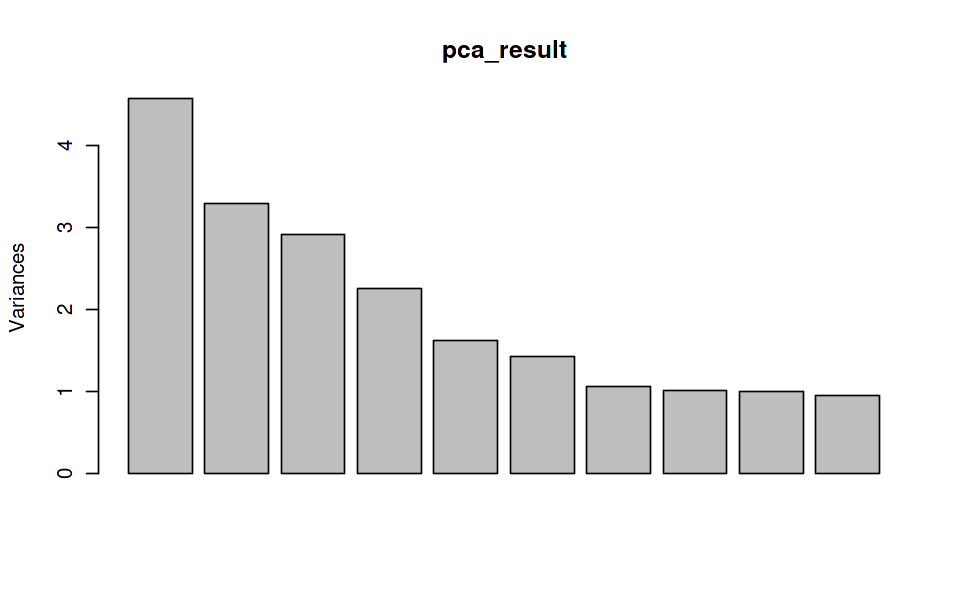

In [28]:
# Apply PCA
pca_result <- prcomp(numeric_data, center = TRUE, scale. = TRUE)

# View summary of PCA
# summary(pca_result)

plot(pca_result)

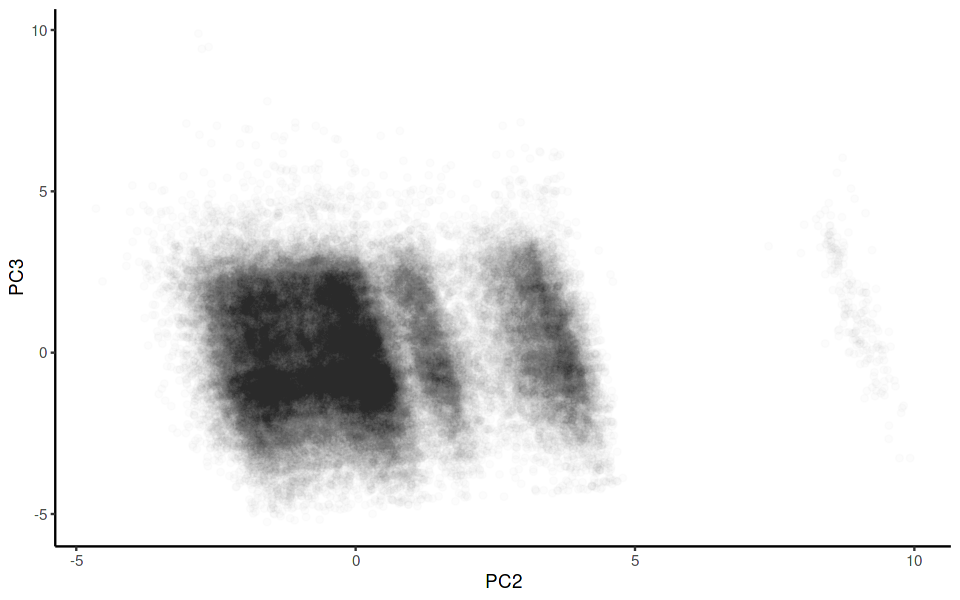

In [34]:
# Convert the top two principal components to a dataframe
pca_data <- as.tibble(pca_result$x[, 1:3])

# Create scatter plot
ggplot(pca_data, aes(x = PC2, y = PC3)) + geom_point(alpha=.01)

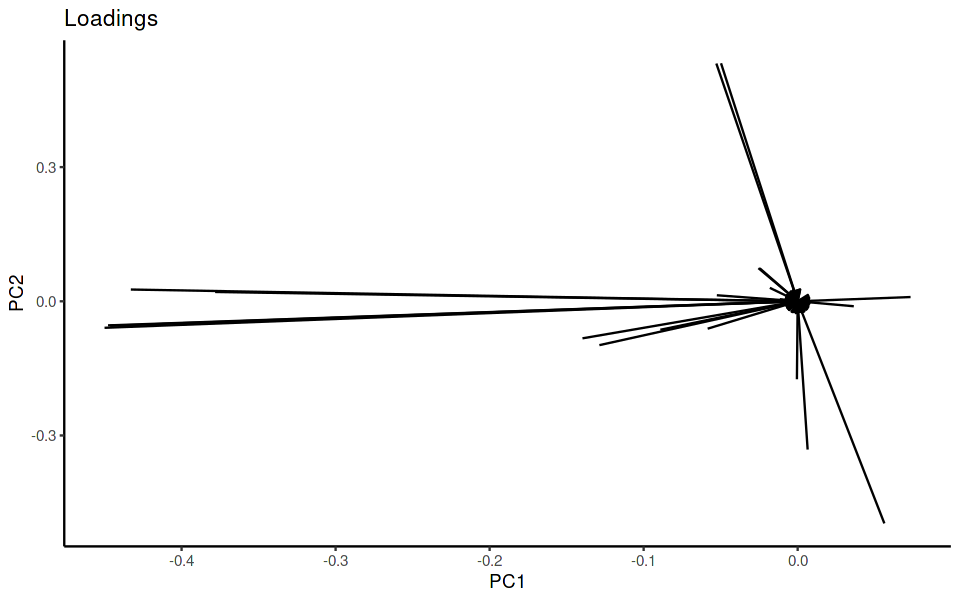

In [35]:
loadings <- as_tibble(pca_result$rotation[, 1:2])

ggplot(loadings, aes(x = PC1, y = PC2)) +
  geom_segment(aes(xend = 0, yend = 0), arrow = arrow(type = "closed", length = unit(0.1, "inches"))) +
  labs(title = "Loadings", x = "PC1", y = "PC2")

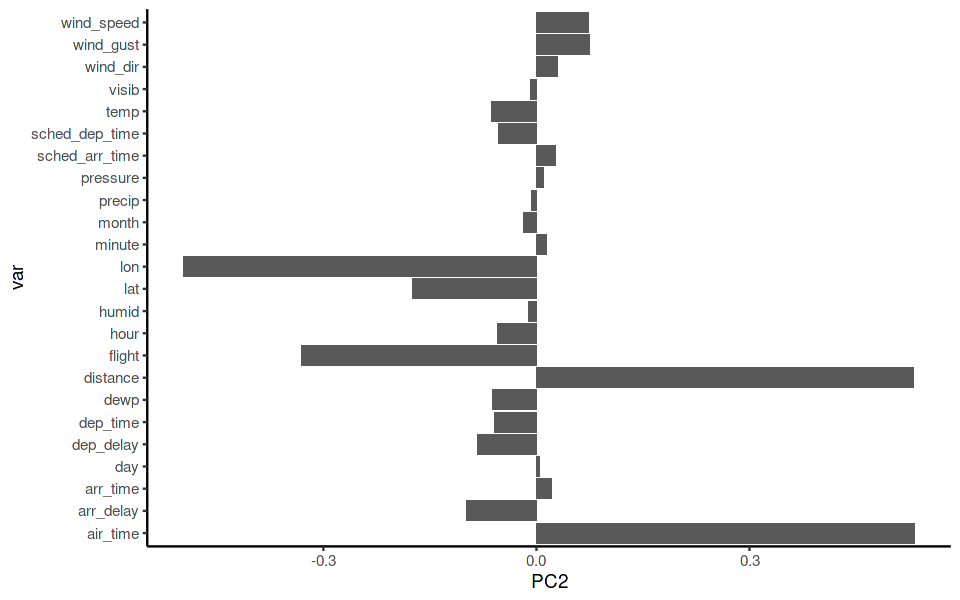

In [37]:
loadings$var <- colnames(numeric_data)

ggplot(loadings) + geom_col(aes(x=var, y=PC2)) + coord_flip()

## Missing data analysis
- In last lecture we saw an example where missing data indicated something important. 
- What about in this flights dataset?

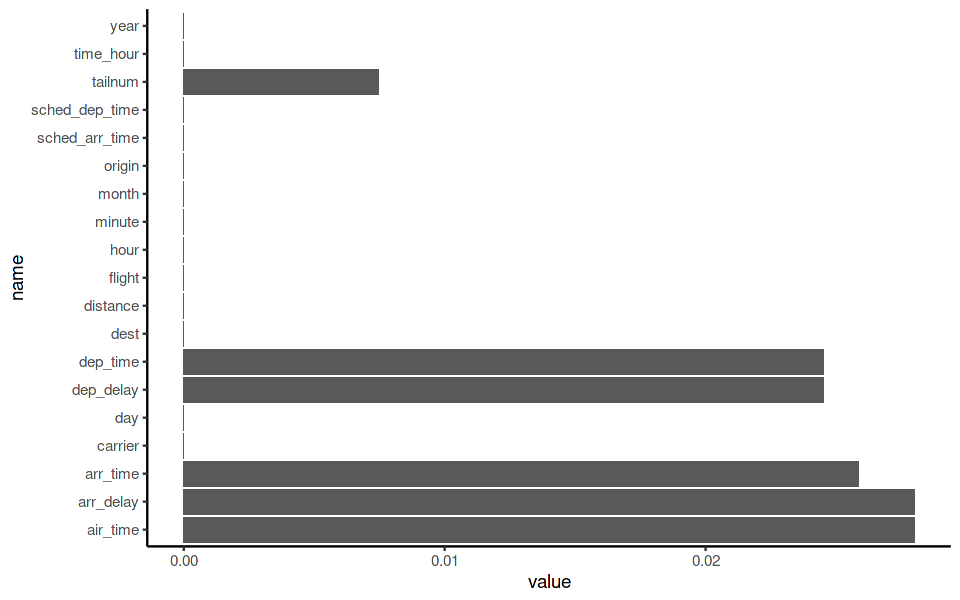

In [39]:
flights %>% summarise_all(~ mean(is.na(.))) %>% pivot_longer(everything()) %>% 
    ggplot + geom_col(aes(x=name, y=value)) + coord_flip()

What (if anything) do these missing values mean?

In [40]:
flights_ext <- flights %>%
  mutate(cancelled = if_else(is.na(dep_delay), 1, 0))

In [41]:
weather_agg <- weather %>%
  group_by(year, month, day, origin) %>%
  summarize(average_temp = mean(temp, na.rm = TRUE),
            average_visib = mean(visib, na.rm = TRUE),
            average_wind_speed = mean(wind_speed, na.rm = TRUE),
            max_gust = max(wind_gust, na.rm = TRUE),
            total_precip = sum(precip, na.rm = TRUE)) 

Warning message:
“There were 295 warnings in `summarize()`.
The first warning was:
ℹ In argument: `max_gust = max(wind_gust, na.rm = TRUE)`.
ℹ In group 7: `year = 2013`, `month = 1`, `day = 3`, `origin = "EWR"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 294 remaining warnings.”
`summarise()` has grouped output by 'year', 'month', 'day'. You can override using the `.groups` argument.


In [42]:
flights_weather <- flights_ext %>%
  left_join(weather_agg, by = c("year", "month", "day", "origin"))

In [ ]:
analysis <- flights_weather %>%
  group_by(average_temp, average_visib, average_wind_speed, max_gust, total_precip) %>%
  summarize(cancel_rate = mean(cancelled))

In [ ]:
ggplot(analysis, aes(x = average_temp, y = cancel_rate)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Cancellation Rate vs. Average Temperature")